In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding="ISO-8859-1")
df.head()

c:\users\sayed\ml_path\env\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Data cleaning

In [3]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [4]:
df = df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','natlty1_txt','gname','weaptype1_txt','nkill']]

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack_Type',
                   'targtype1_txt':'Target_Type','natlty1_txt':'Nationality_target','gname':'Attack_Group',
                   'weaptype1_txt':'Weapon','nkill':'Number_of_Killed'},inplace=True)
df.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,Nationality_target,Attack_Group,Weapon,Number_of_Killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,United States,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,Incendiary,NaN


<AxesSubplot:>

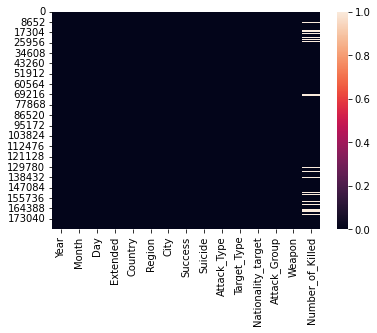

In [5]:
import seaborn as sns
sns.heatmap(df.isnull())

In [6]:
df['City'].isnull().sum()
df['City'].fillna('Unknown',inplace=True)

In [7]:
df['Nationality_target'].isnull().sum()
df['Nationality_target'].fillna('Unknown',inplace=True)

In [8]:
df.isnull().sum()

Year                      0
Month                     0
Day                       0
Extended                  0
Country                   0
Region                    0
City                      0
Success                   0
Suicide                   0
Attack_Type               0
Target_Type               0
Nationality_target        0
Attack_Group              0
Weapon                    0
Number_of_Killed      10313
dtype: int64

In [9]:
df['Number_of_Killed'].fillna(df['Number_of_Killed'].mode()[0],inplace=True)
df['Number_of_Killed'].value_counts()

0.0      98462
1.0      36576
2.0      14147
3.0       7738
4.0       4961
         ...  
275.0        1
320.0        1
104.0        1
271.0        1
311.0        1
Name: Number_of_Killed, Length: 205, dtype: int64

<AxesSubplot:>

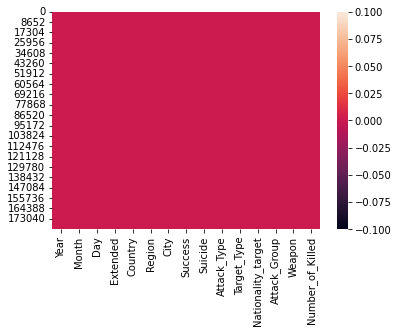

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.duplicated().count()

181691

<AxesSubplot:title={'center':'Duplicated values'}>

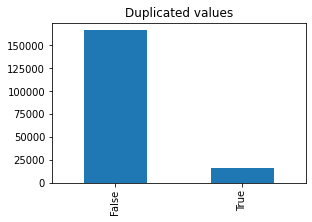

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)

plt.subplot2grid(fig_dims, (0, 0))
df.duplicated().value_counts().plot(kind='bar',title='Duplicated values')

In [13]:
df.drop_duplicates(keep=False,inplace=True)

In [14]:
df.duplicated().value_counts()

False    159172
dtype: int64

### EDA

<AxesSubplot:title={'center':'Terrorist activities followed by each year'}>

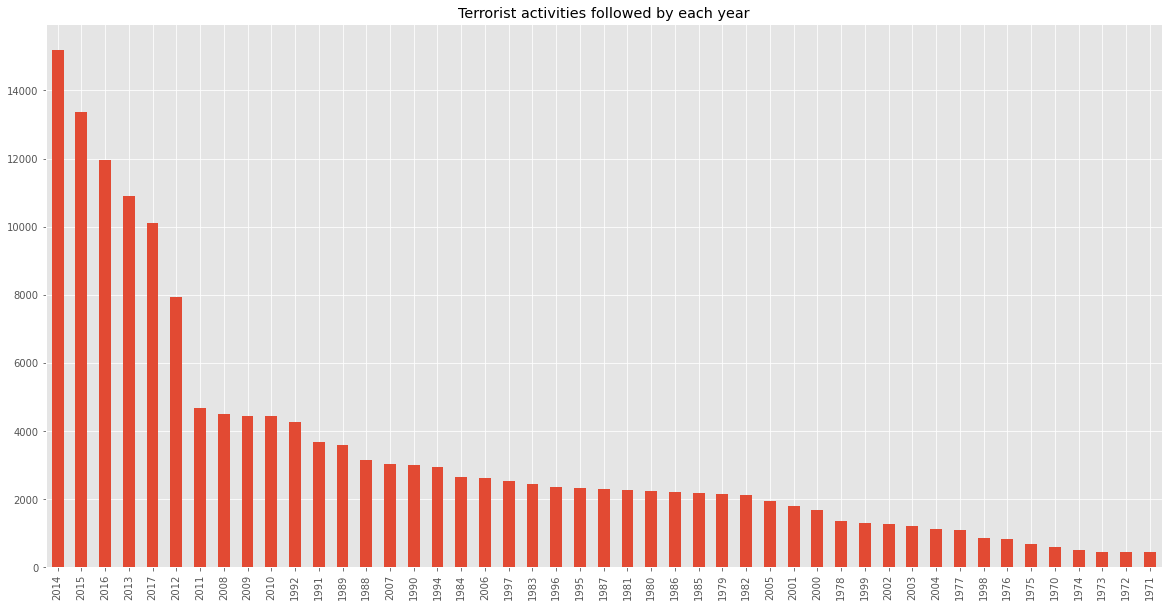

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df['Year'].value_counts().plot.bar(title='Terrorist activities followed by each year',rot=90,figsize=[20,10])

<AxesSubplot:title={'center':'Countries where the incident occurred.'}>

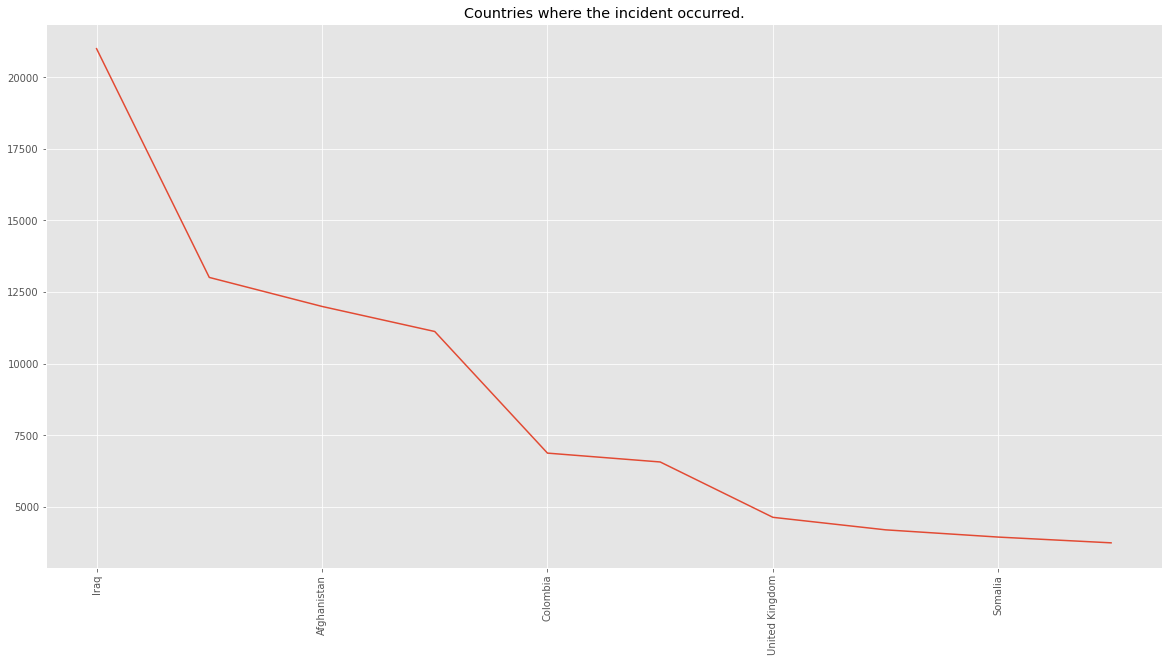

In [16]:
plt.style.use('ggplot')
df['Country'].value_counts().head(10).plot.line(title='Countries where the incident occurred.',rot=90,figsize=[20,10])

<AxesSubplot:title={'center':'Cities where the incident occurred.'}>

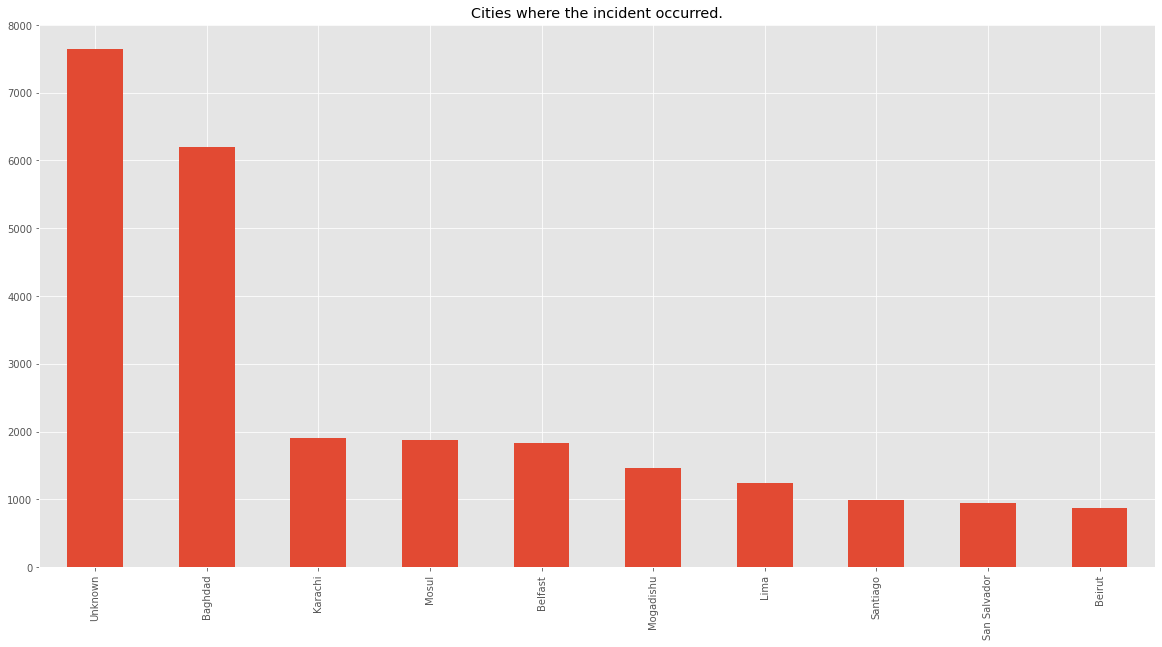

In [17]:
plt.style.use('ggplot')
df['City'].value_counts().head(10).plot.bar(title='Cities where the incident occurred.',rot=90,figsize=[20,10])

<AxesSubplot:title={'center':'Success of terrorist strike'}>

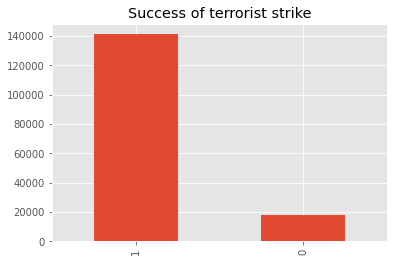

In [18]:
plt.style.use('ggplot')
df['Success'].value_counts().plot.bar(title='Success of terrorist strike',rot=90)

'1 = "Yes" The incident was a suicide attack. 0 = "No"'

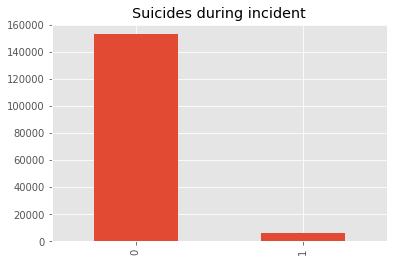

In [19]:
plt.style.use('ggplot')
df['Suicide'].value_counts().plot.bar(title='Suicides during incident',rot=90)
display('1 = "Yes" The incident was a suicide attack. 0 = "No"')

<AxesSubplot:title={'center':'Attack types'}>

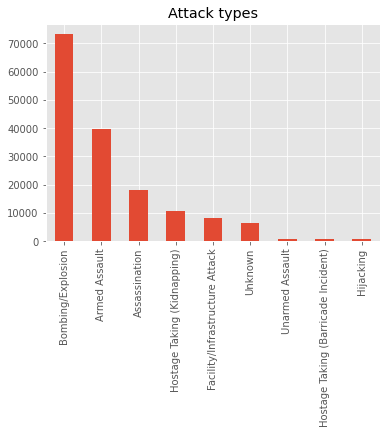

In [20]:
plt.style.use('ggplot')
df['Attack_Type'].value_counts().plot.bar(title='Attack types',rot=90)

<AxesSubplot:>

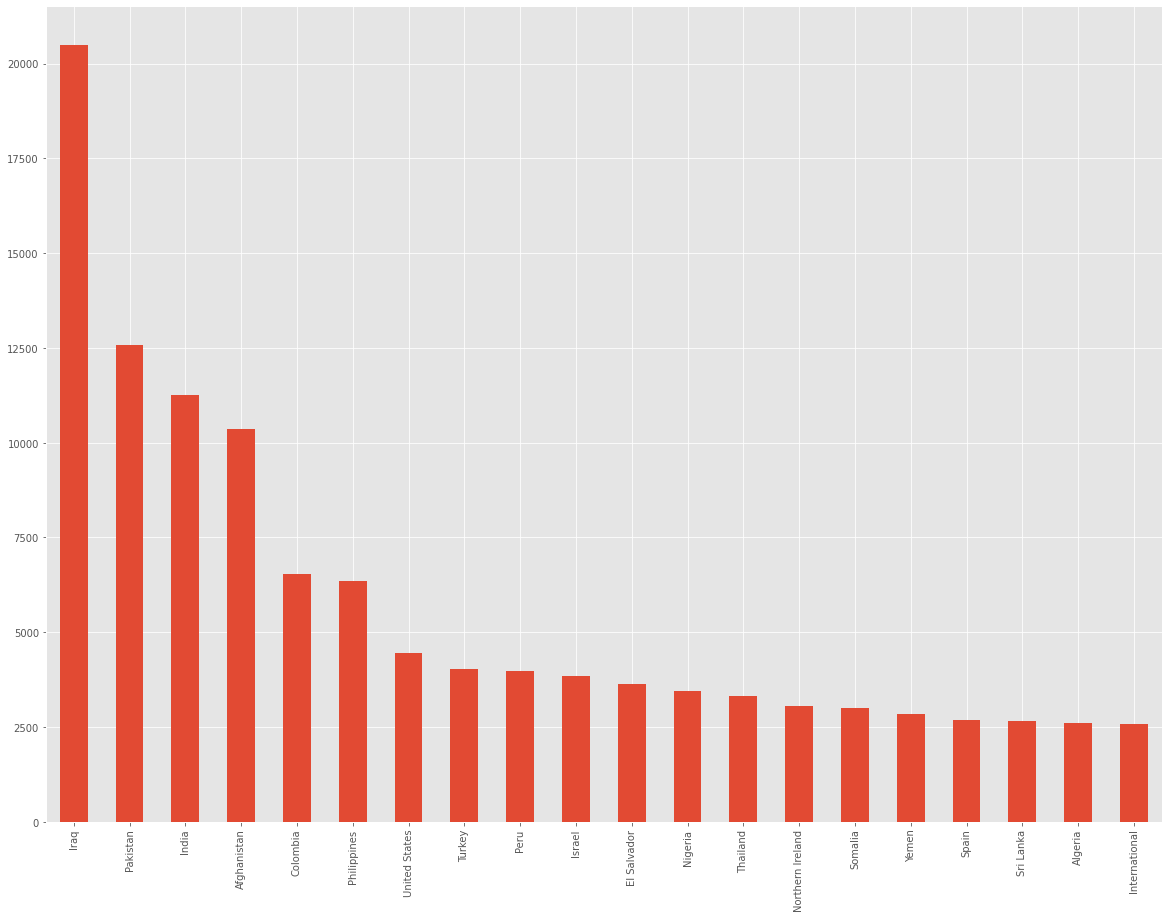

In [31]:
plt.style.use('ggplot')
df['Nationality_target'].value_counts().head(20).plot(kind='bar',figsize=[20,15])